In [45]:
import matplotlib.pyplot as plt
import pickle
import numpy
np = numpy
import os
import shutil

In [46]:
def moving_avg(x, N=500):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

def get_bleu(dirFile):
    with open(dirFile, 'r') as f:
        data = f.readlines()
    return float(data[-1])*100.0

def get_bleu_detok_avg(dirFile):
    with open(dirFile, 'r') as f:
        data = f.readlines()
#     print(dirFile, data)
    b = data[0].split(',')[0].split(' ')[-1]
    return float(b)

def get_ep_lst_bleu_lst(dirSet, f_bleu='bleu.log', flag_detok_avg=False):
    dirFile_lst = [os.path.join(dirSet, '{d}/{f}'.format(d=d, f=f_bleu)) for d in os.listdir(dirSet) if 'smooth' not in d]
    ep_lst = [float(x.split('_')[-1].split('/')[0]) for x in dirFile_lst]
    tmp = sorted(zip(ep_lst, dirFile_lst))
    ep_lst, dirFile_lst = [ list(tpl) for tpl in zip(*tmp)]
    if flag_detok_avg:
        return ep_lst, [get_bleu_detok_avg(d) for d in dirFile_lst]
    else:
        return ep_lst, [get_bleu(d) for d in dirFile_lst]

# def plot_bleu_lst(ep_lst, bleu_lst, y_lab='4-gram BLEU'):
#     plt.plot(ep_lst, bleu_lst)
#     m = max(bleu_lst)
#     i = ep_lst[bleu_lst.index(m)]
#     plt.plot(i, m, 'x', label='max = {} at ep {}'.format(m,i))
#     plt.xlabel('epoch'); plt.ylabel(y_lab)
#     plt.legend()
#     plt.show()
    
def plot_bleu_lst(ep_lst, bleu_lst, y_lab='4-gram BLEU', ylim=[], nb_top=3):
    plt.plot(ep_lst, bleu_lst)
    tmp = sorted(zip(bleu_lst, ep_lst))
    bleu_lst_ascend, ep_lst_ascend = [ list(tpl) for tpl in zip(*tmp)]
    for i in range(1,1+nb_top):
        e, b = ep_lst_ascend[-i], bleu_lst_ascend[-i]
        plt.plot(e, b, 'x', label='#{} BLEU = {} at ep {}'.format(i, b, e))
    plt.xlabel('epoch'); plt.ylabel(y_lab)
    if ylim: plt.ylim(ylim)
    plt.legend()
    plt.show()

In [47]:
def get_dct_lst(dirFile_lst):
    dct_lst = []
    for dirFile in dirFile_lst:
        with open(dirFile,'rb') as f:
            dct_lst.append(pickle.load(f))
    return dct_lst

def smooth_dct_lst(dct_lst):
    for dct in dct_lst:
        for k in dct.keys():
            dct[k] = moving_avg(dct[k], N=500)
    return dct_lst

In [53]:
def clean_exp_ckpts(dir_exp, devset, nb_ckpt_to_keep=3, flag_doit=False):
    # get ckpts to keep
    dirSet = os.path.join(dir_exp, devset)
    ep_lst, bleu_lst = get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True)
    tmp = sorted(zip(bleu_lst, ep_lst))
    bleu_lst_ascend, ep_lst_ascend = [ list(tpl) for tpl in zip(*tmp)]
    lst_ckpts_to_keep = ep_lst_ascend[-nb_ckpt_to_keep:] + [sorted(ep_lst)[-1]]
    lst_ckpts_to_rm = [e for e in ep_lst if e not in lst_ckpts_to_keep]
#     print(sorted(lst_ckpts_to_rm))
    
    # rm the rest
    for c in os.listdir(os.path.join(dir_exp,'checkpoints')):
        dir_ckpt = os.path.join(dir_exp,'checkpoints/{}/'.format(c))
        if flag_doit:
            print('removing: {}').format(dir_ckpt)
            shutil.rmtree(dir_ckpt, ignore_errors=False, onerror=None)
        else:
            print('to be removed: {}').format(dir_ckpt)
    for c in sorted(lst_ckpts_to_rm):
        dir_ckpt = os.path.join(dir_exp, 'checkpoints_epoch/{}/'.format(int(c)))
        if os.path.isdir(dir_ckpt):
            if flag_doit:
                print('removing: {}').format(dir_ckpt)
                shutil.rmtree(dir_ckpt, ignore_errors=False, onerror=None)
            else:
                print('to be removed: {}').format(dir_ckpt)

In [56]:
dir_base = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/'
lst_dir_exp = [os.path.join(dir_base, e) for e in os.listdir(dir_base) if 'v0002' in e]
devset = 'tst2013'
flag_doit = False
for dir_exp in lst_dir_exp:
    print(dir_exp)
    clean_exp_ckpts(dir_exp, devset, nb_ckpt_to_keep=3, flag_doit=flag_doit)

/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf
/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50-v2
/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50-pretrain
/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50-pretrain-lr0.001
/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50-pretrain-lr0.002


In [11]:
dir_exp = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-aoaf-tf0.8-selectKL50.0/'
devset = 'tst2013'
clean_exp_ckpts(dir_exp, devset, nb_ckpt_to_keep=3, flag_doit=False)

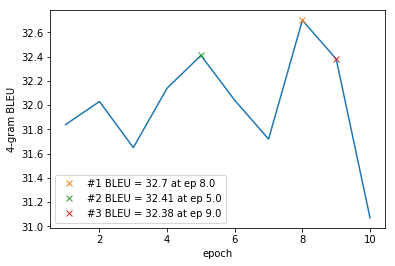

In [46]:
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-aoaf-tf0.8-selectKL50.0/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

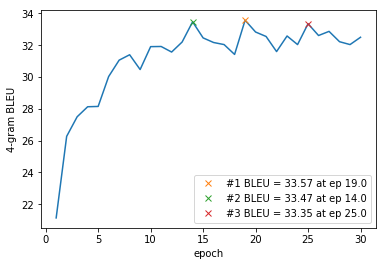

In [5]:
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

In [39]:
# reading data generate plot
def get_xNy(dirFile,print_every=200):
    with open(dirFile,'r') as f:
        data = f.readlines()
    data = [d.strip('\n').split(' ')[-1] for d in data if 'fr_percent' in d]
    data = [float(d) for d in data]
    x_lst = [x*print_every for x in range(1,1+len(data))]
    return x_lst, data

In [42]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr15/log.txt'
x_lst_fr15, data_fr15 = get_xNy(dirFile)

dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-log/log.txt'
x_lst, data = get_xNy(dirFile)

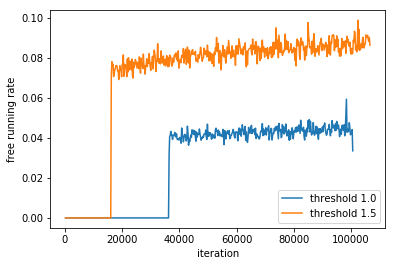

In [45]:
plt.plot(x_lst, data, label='threshold 1.0')
plt.plot(x_lst_fr15, data_fr15, label='threshold 1.5')
plt.xlabel('iteration'); plt.ylabel('free running rate')
plt.legend()
plt.show()

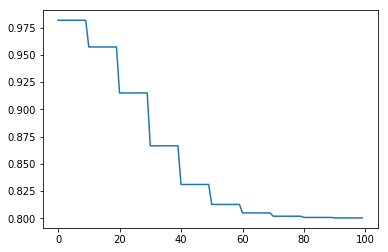

In [9]:
k = 10
ss_max = 0.2
i = np.array(range(100))
p = (1-ss_max) + ss_max * (k / (k + np.exp(i/k)))
plt.plot(i, p)
plt.show()

check BLEU

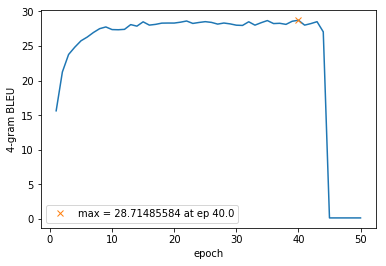

In [11]:
# asup
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf/tst2014/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log'))

('aaf-v0002-tf', 'tst2013')


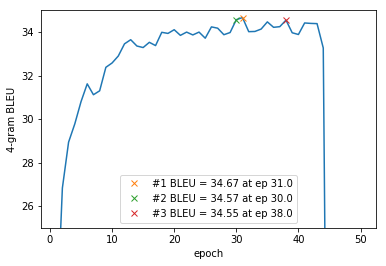

('aaf-v0002-tf', 'tst2014')


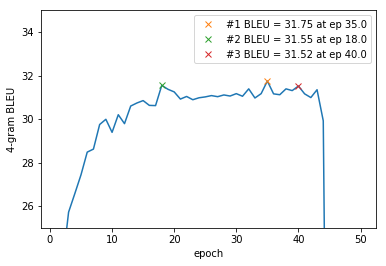

('aaf-v0002-tf-bs50-v2', 'tst2013')


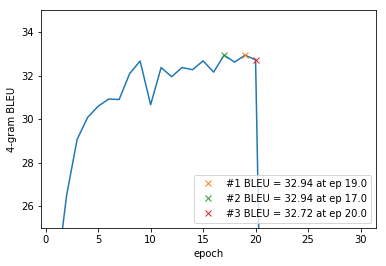

('aaf-v0002-tf-bs50-v2', 'tst2014')


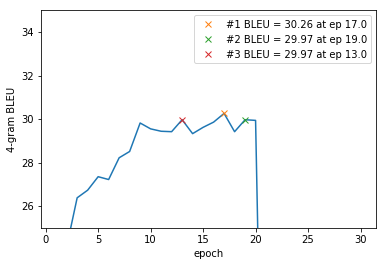

('aaf-v0013-aftf-bs128', 'tst2013')


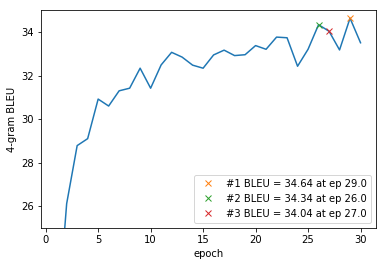

('aaf-v0013-aftf-bs128', 'tst2014')


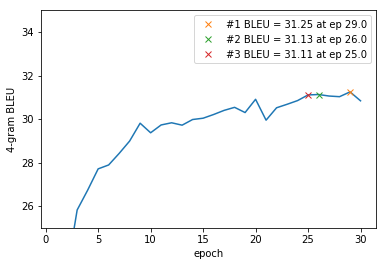

('aaf-v0013-aftf', 'tst2013')


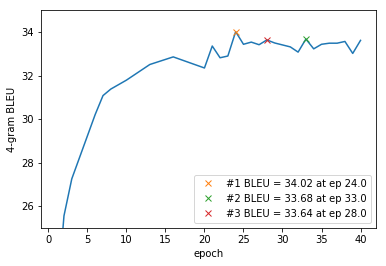

('aaf-v0013-aftf', 'tst2014')


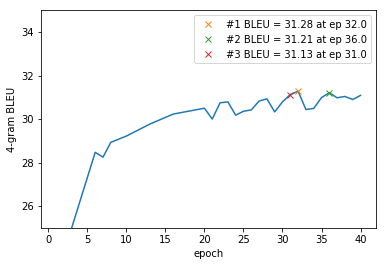

In [9]:
for exp in ['aaf-v0002-tf', 'aaf-v0002-tf-bs50-v2', 'aaf-v0013-aftf-bs128', 'aaf-v0013-aftf']:
    for tst in ['tst2013', 'tst2014']:
        print(exp, tst)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/{}/{}/'.format(exp, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

('tst2013', 0.0)


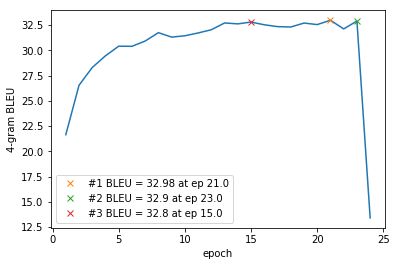

('tst2014', 0.0)


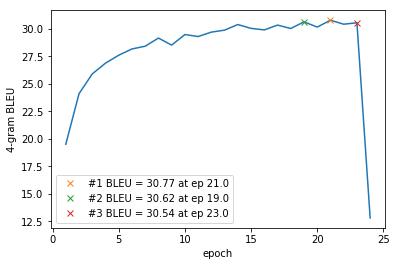

('tst2013', 2.0)


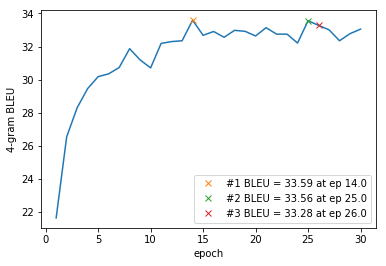

('tst2014', 2.0)


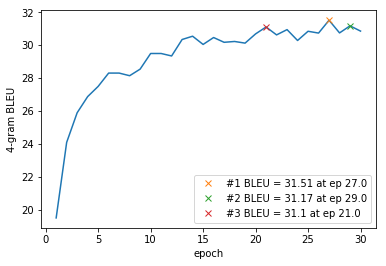

('tst2013', 3.0)


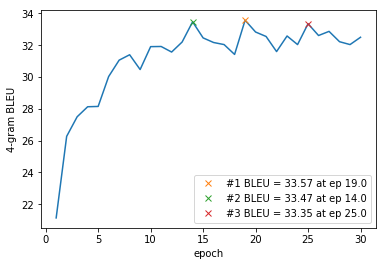

('tst2014', 3.0)


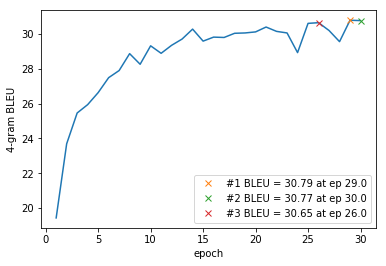

('tst2013', 3.1)


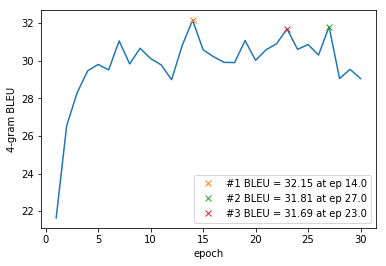

('tst2014', 3.1)


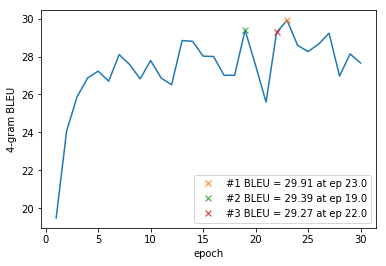

('tst2013', 3.15)


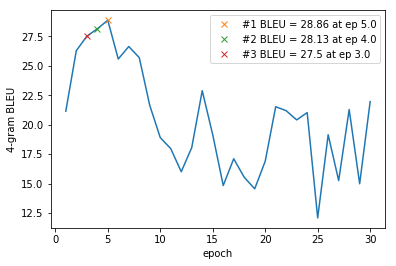

('tst2014', 3.15)


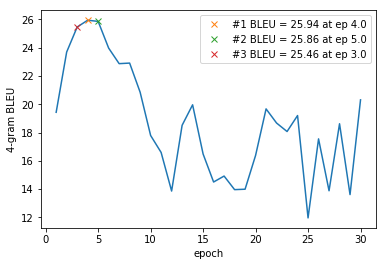

('tst2013', 3.25)


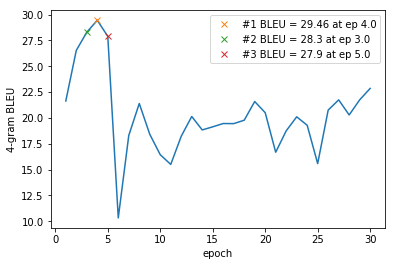

('tst2014', 3.25)


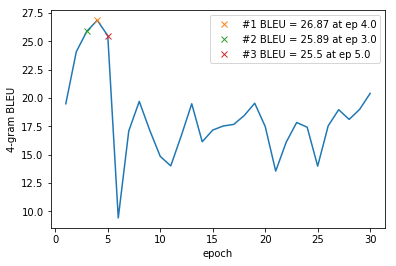

In [4]:
for fr in [0.0, 2.0, 3.0, 3.1, 3.15, 3.25]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr{}/{}/'.format(fr,tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

('tst2013', 3.25)


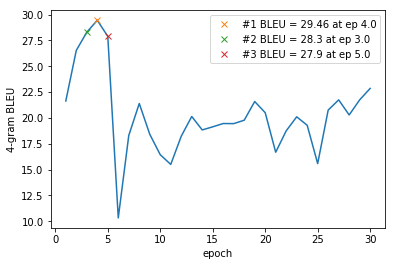

('tst2014', 3.25)


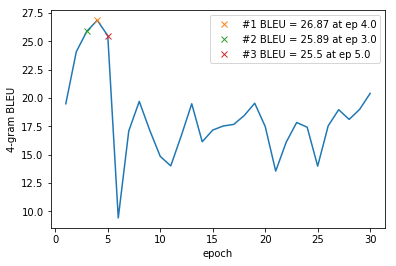

In [8]:
# 202007 check BLEU scorer; it works as before
for fr in [3.25]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr{}/{}/'.format(fr,tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

('tst2013', 20)


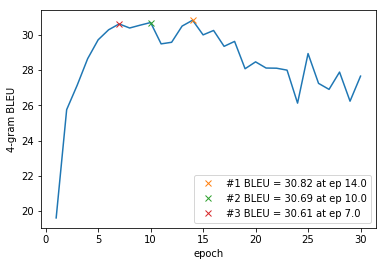

('tst2014', 20)


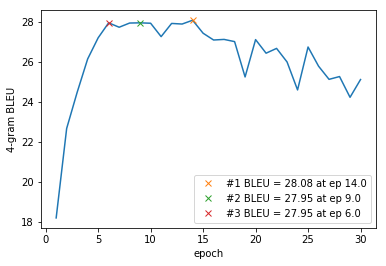

('tst2013', 30)


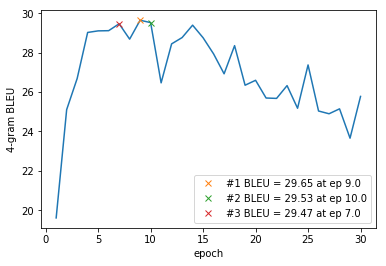

('tst2014', 30)


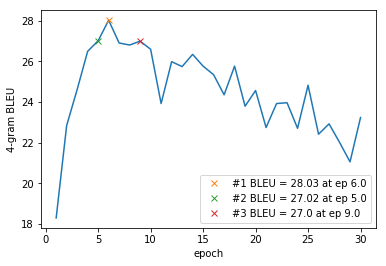

In [4]:
for fr in [20, 30]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0040-paf-nbFrToken{}-scratch/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

In [ ]:
# add pretrain

('', 'tst2013')


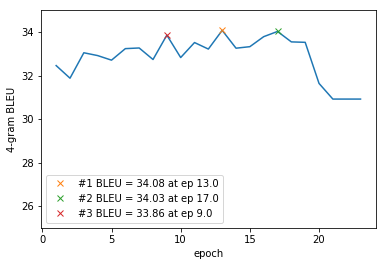

('', 'tst2014')


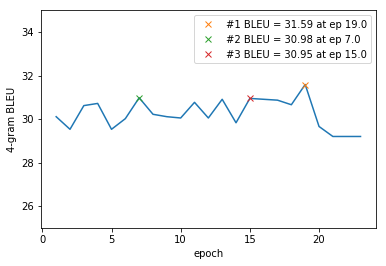

('-lr0.002', 'tst2013')


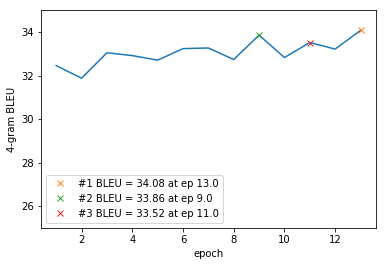

('-lr0.002', 'tst2014')


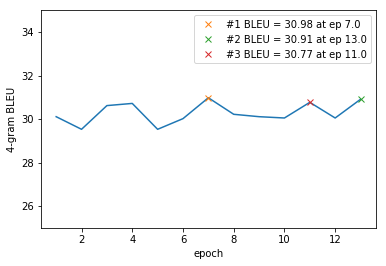

('-lr0.001', 'tst2013')


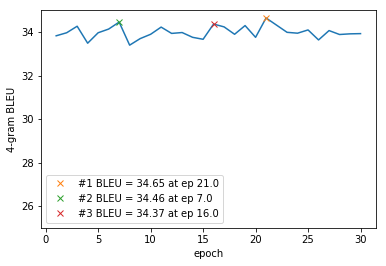

('-lr0.001', 'tst2014')


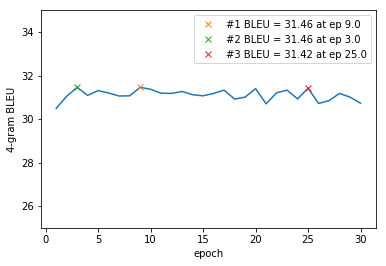

In [7]:
for fr in ['', '-lr0.002', '-lr0.001']:
    for tst in ['tst2013', 'tst2014']:
        print(fr, tst)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50-pretrain{}/{}/'.format(fr,tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

('', 'tst2013')


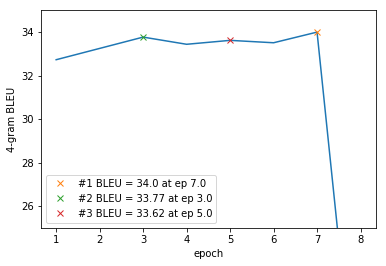

('', 'tst2014')


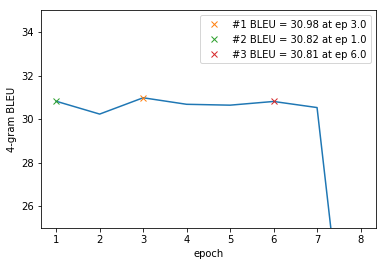

('-lr0.001', 'tst2013')


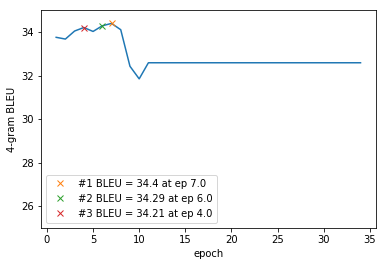

('-lr0.001', 'tst2014')


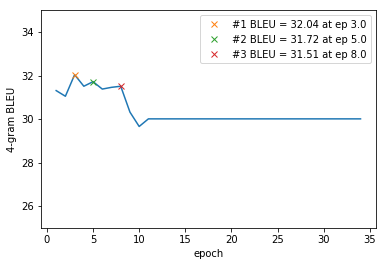

In [7]:
for fr in ['', '-lr0.001']:
    for tst in ['tst2013', 'tst2014']:
        print(fr, tst)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0013-aftf-pretrain{}/{}/'.format(fr,tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

('tst2013', 2.0)


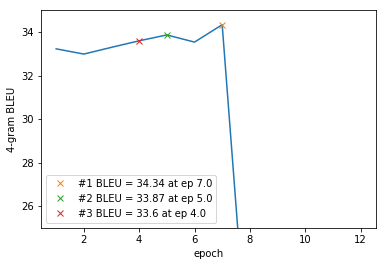

('tst2014', 2.0)


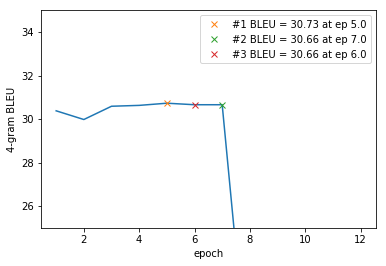

('tst2013', 3.0)


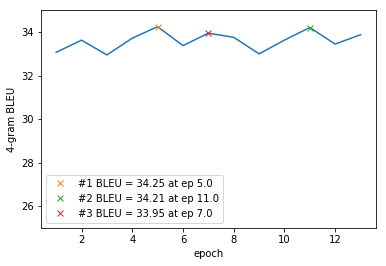

('tst2014', 3.0)


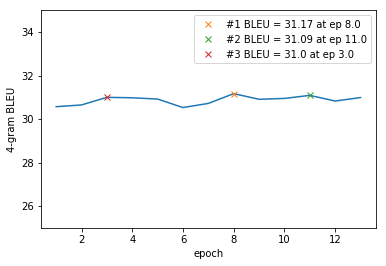

('tst2013', 3.1)


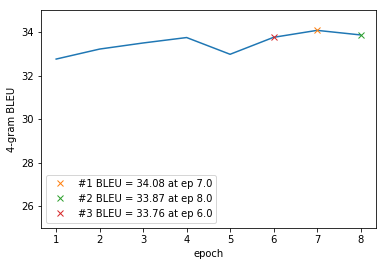

('tst2014', 3.1)


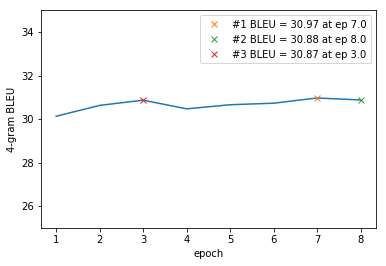

('tst2013', 3.1)


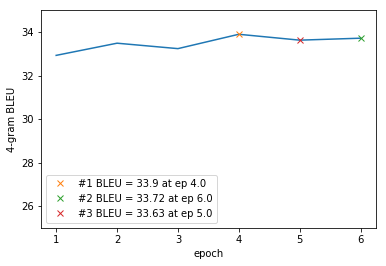

('tst2014', 3.1)


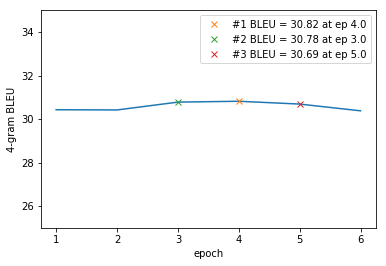

In [5]:
for fr in [2.0, 3.0, 3.1]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr{}-pretrain/{}/'.format(fr,tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])
        
for fr in [3.1]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr{}-pretrain-v0/{}/'.format(fr,tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

('tst2013', 5)


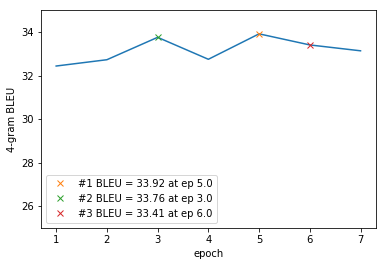

('tst2014', 5)


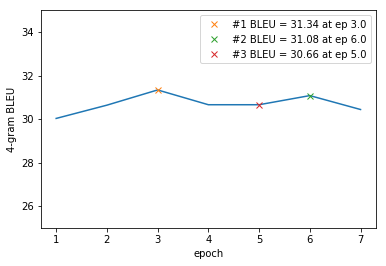

('tst2013', 10)


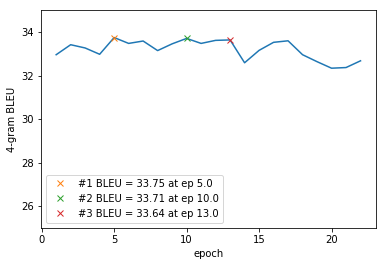

('tst2014', 10)


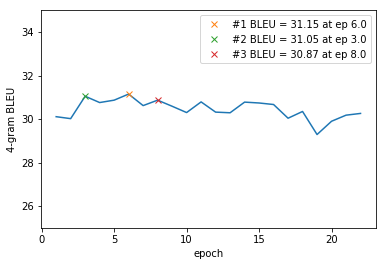

('tst2013', 20)


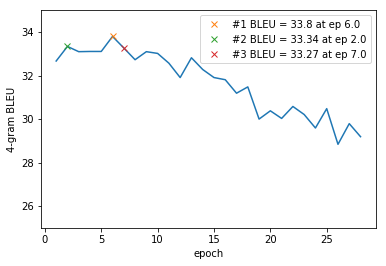

('tst2014', 20)


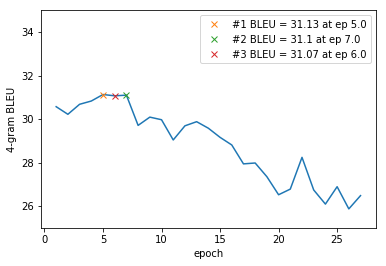

In [8]:
for fr in [5, 10, 20]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0040-paf-nbFrToken{}/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

('tst2013', 3.0)


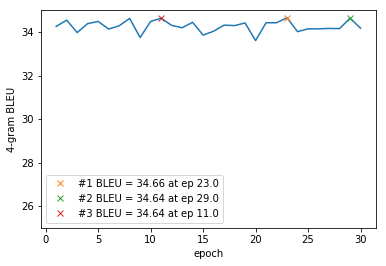

('tst2014', 3.0)


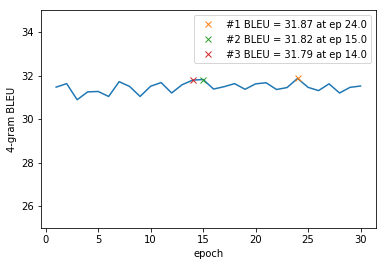

('tst2013', 5)


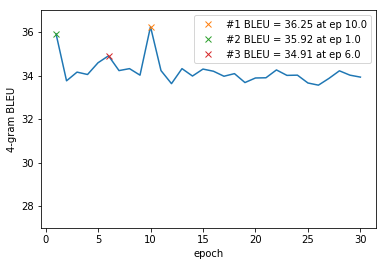

('tst2014', 5)


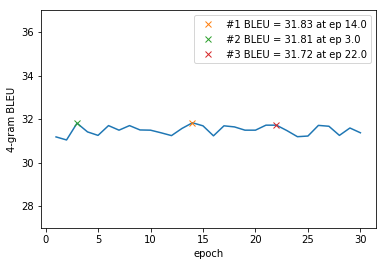

In [3]:
for fr in [3.0]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr{}-pretrain-lr0.001/{}/'.format(fr,tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

for fr in [5]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0040-paf-nbFrToken{}-lr0.001/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[27,37])

('tst2013', 3.0)


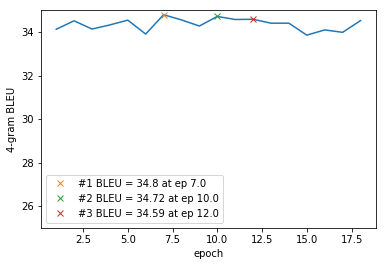

('tst2014', 3.0)


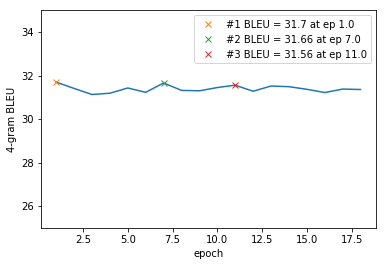

('tst2013', 3.1)


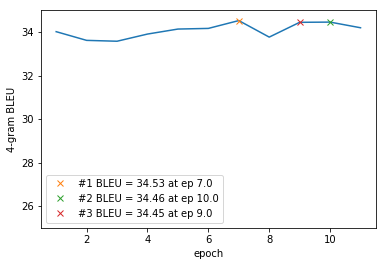

('tst2014', 3.1)


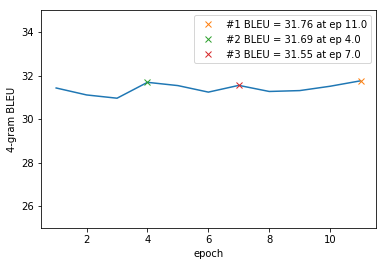

In [58]:
for fr in [3.0, 3.1]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr{}-pretrain-lr0.001-smoothKL/{}/'.format(fr,tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

('tst2013', 0.2)


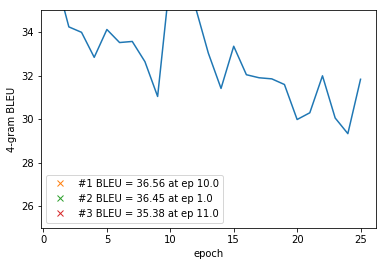

('tst2014', 0.2)


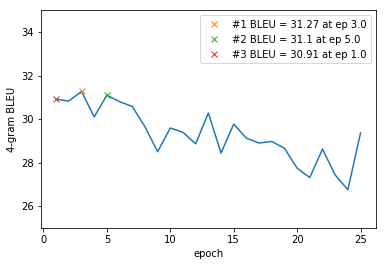

('tst2013', 0.1)


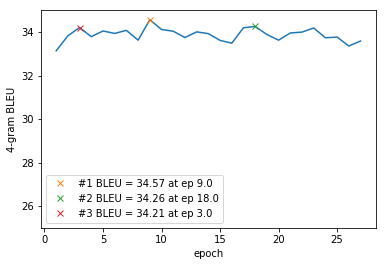

('tst2014', 0.1)


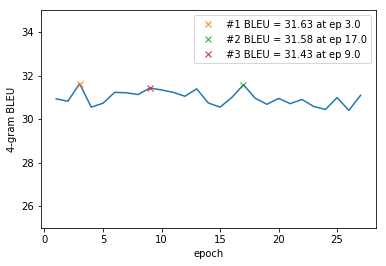

In [3]:
for fr in [0.2, 0.1]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0004-ss-max{}/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

('tst2013', 0.1)


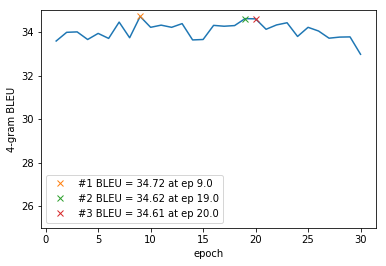

('tst2014', 0.1)


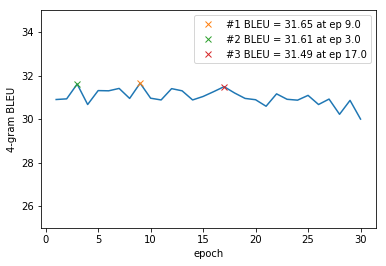

('tst2013', 0.2)


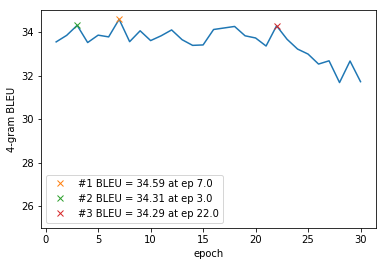

('tst2014', 0.2)


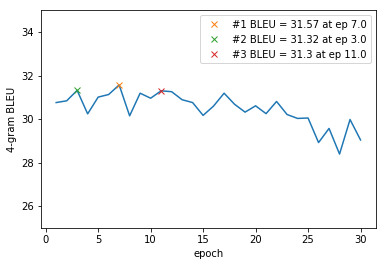

In [7]:
for fr in [0.1, 0.2]:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0004-ss-max{}linear/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35])

('tst2013', '-asup')


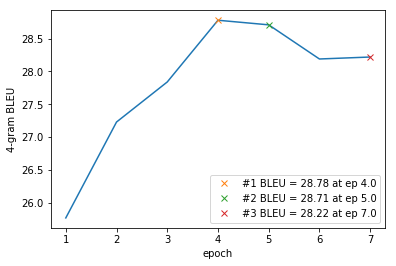

('tst2014', '-asup')


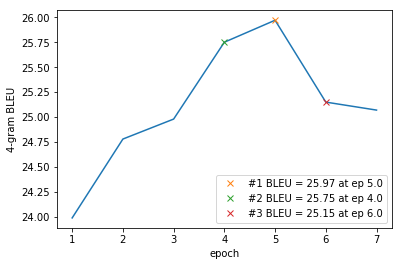

('tst2013', '-asup-detach')


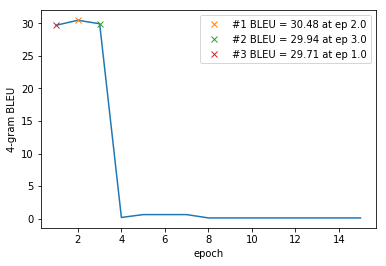

('tst2014', '-asup-detach')


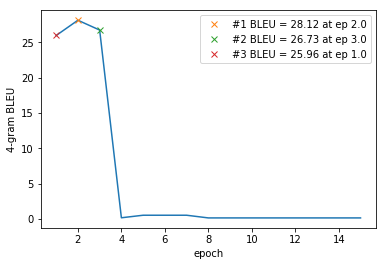

('tst2013', '-notf')


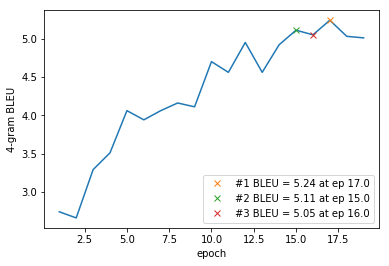

('tst2014', '-notf')


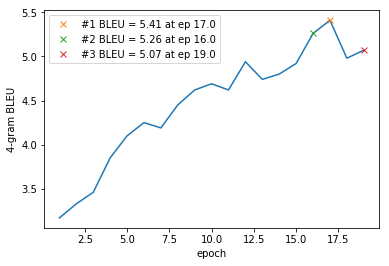

('tst2013', '-asup-sched')


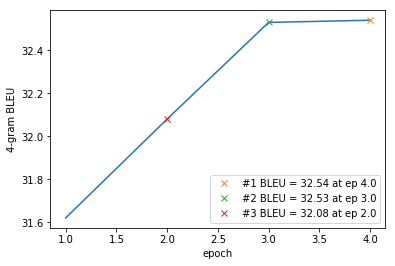

('tst2014', '-asup-sched')


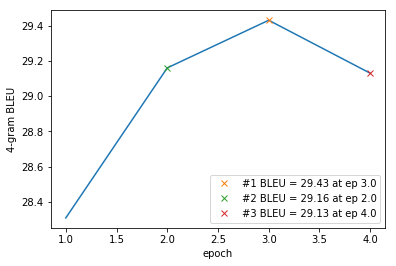

In [16]:
for fr in ['-asup', '-asup-detach', '-notf', '-asup-sched']:
# for fr in ['-asup-detach', '-notf', '-asup-sched']:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf{}/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[], nb_top=3)

('tst2013', '-tf')


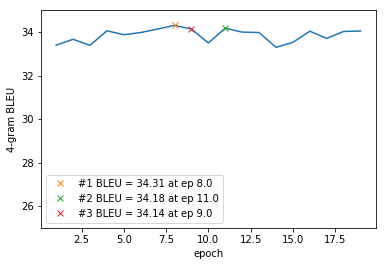

('tst2014', '-tf')


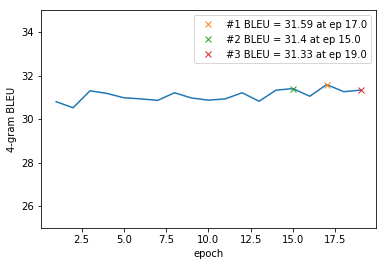

('tst2013', '-sched')


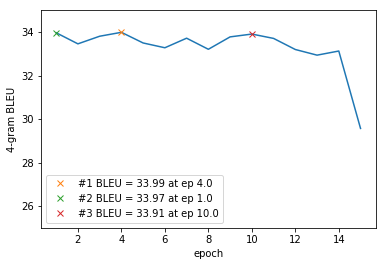

('tst2014', '-sched')


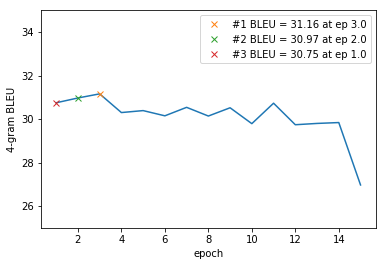

In [11]:
for fr in ['-tf', '-sched']:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf{}/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35], nb_top=3)

('tst2013', '1.0')


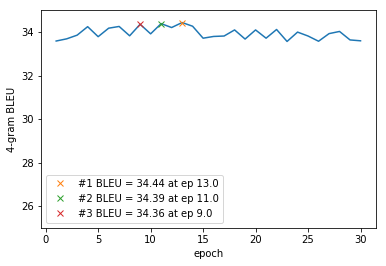

('tst2014', '1.0')


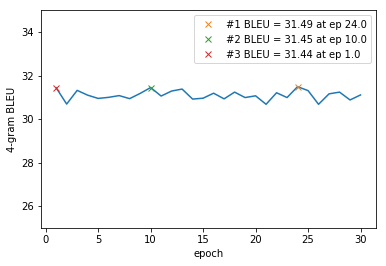

('tst2013', '0.9')


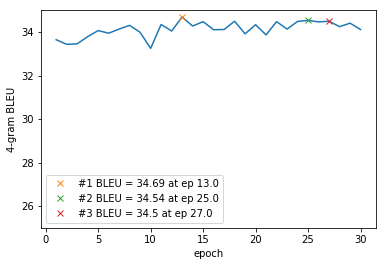

('tst2014', '0.9')


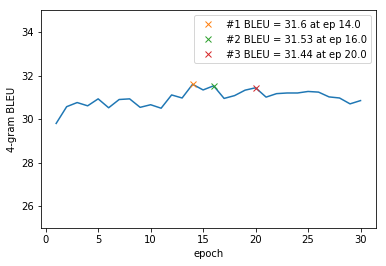

('tst2013', '0.8')


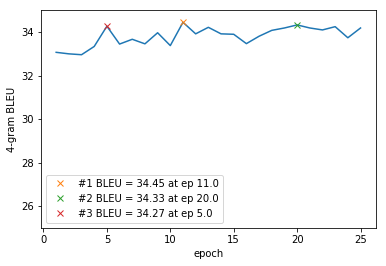

('tst2014', '0.8')


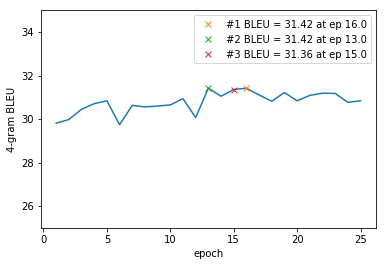

('tst2013', '0.6')


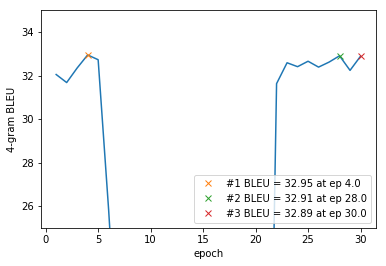

('tst2014', '0.6')


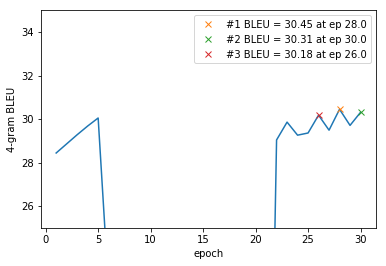

('tst2013', '0.5')


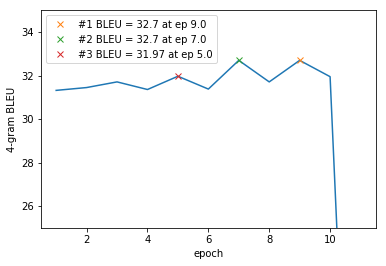

('tst2014', '0.5')


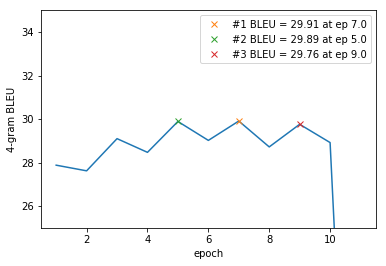

('tst2013', '0.2')


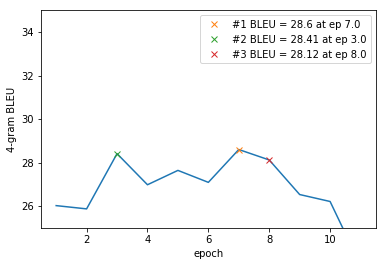

('tst2014', '0.2')


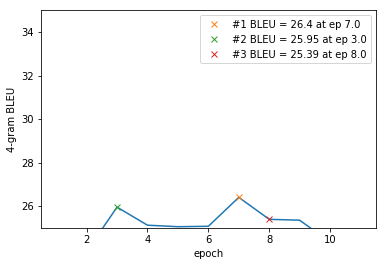

In [9]:
for fr in ['1.0', '0.9', '0.8', '0.6', '0.5', '0.2']:
# for fr in ['0.8']:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf{}/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35], nb_top=3)

('tst2013', '0.8-alwaysKL')


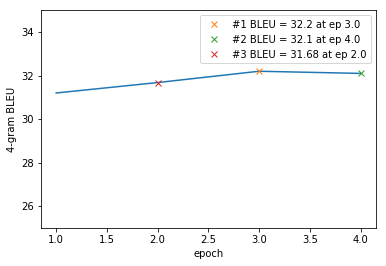

('tst2014', '0.8-alwaysKL')


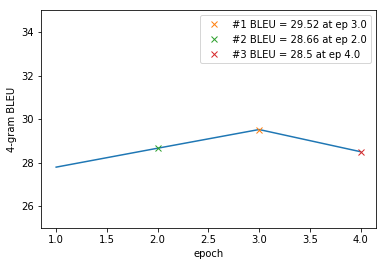

('tst2013', '0.5-alwaysKL')


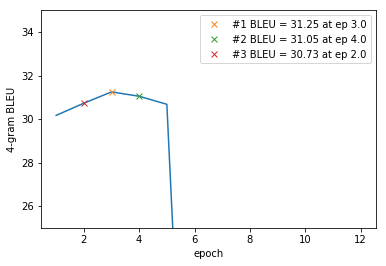

('tst2014', '0.5-alwaysKL')


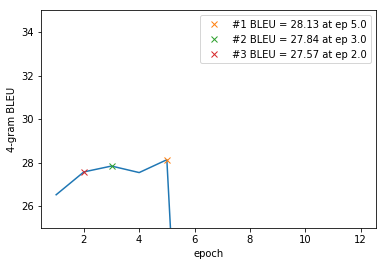

('tst2013', '0.8-noKL')


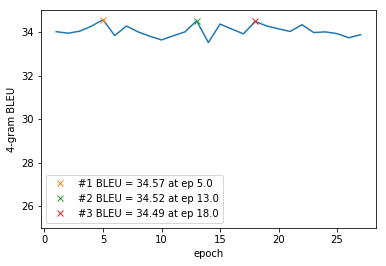

('tst2014', '0.8-noKL')


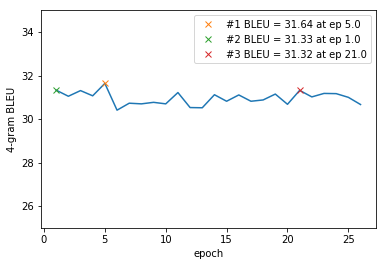

In [8]:
for fr in ['0.8-alwaysKL', '0.5-alwaysKL', '0.8-noKL']:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf{}/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35], nb_top=3)

('tst2013', '0.9-alwaysKLsmooth2.0')


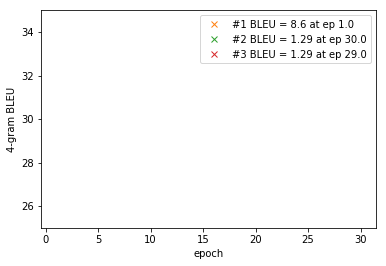

('tst2014', '0.9-alwaysKLsmooth2.0')


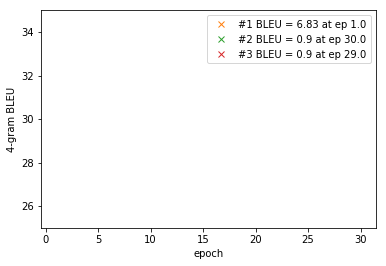

('tst2013', '0.9-alwaysKLsmooth1.0')


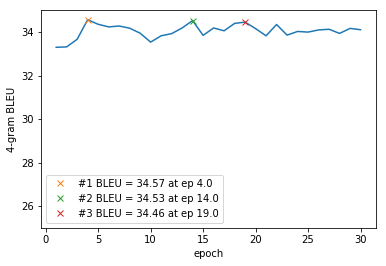

('tst2014', '0.9-alwaysKLsmooth1.0')


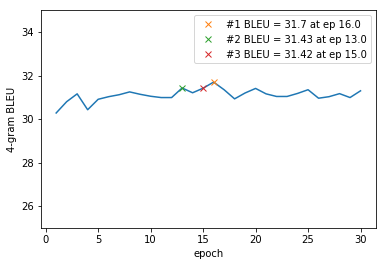

('tst2013', '0.9-alwaysKLsmooth0.5')


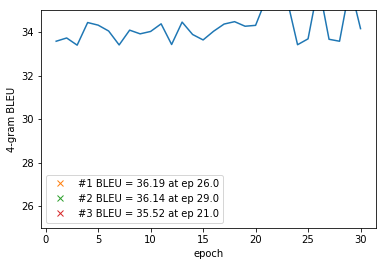

('tst2014', '0.9-alwaysKLsmooth0.5')


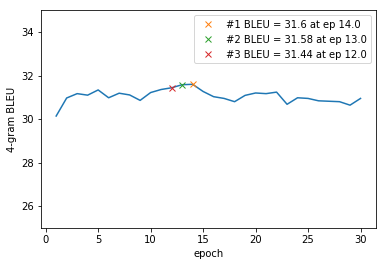

('tst2013', '0.8-alwaysKLsmooth10.0')


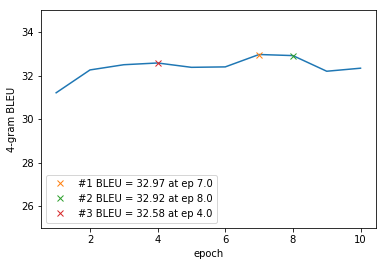

('tst2014', '0.8-alwaysKLsmooth10.0')


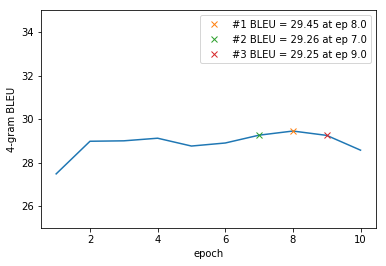

('tst2013', '0.8-alwaysKLsmooth5.0')


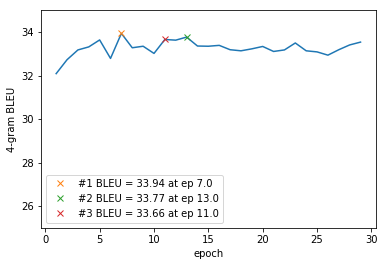

('tst2014', '0.8-alwaysKLsmooth5.0')


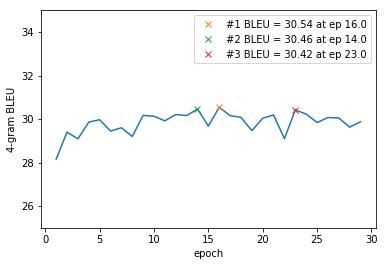

('tst2013', '0.8-alwaysKLsmooth2.0')


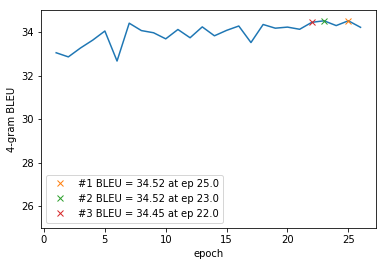

('tst2014', '0.8-alwaysKLsmooth2.0')


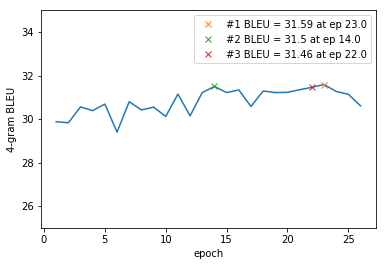

('tst2013', '0.8-alwaysKLsmooth1.0')


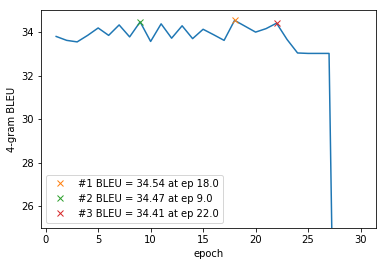

('tst2014', '0.8-alwaysKLsmooth1.0')


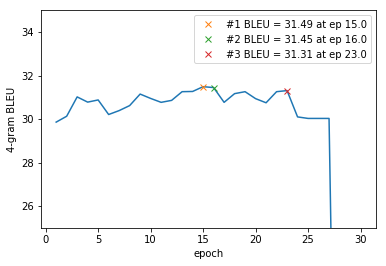

('tst2013', '0.8-alwaysMSE20.0')


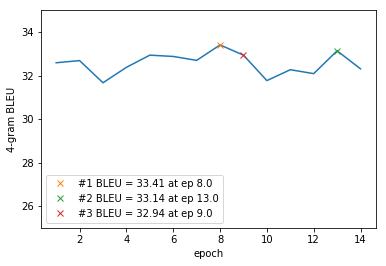

('tst2014', '0.8-alwaysMSE20.0')


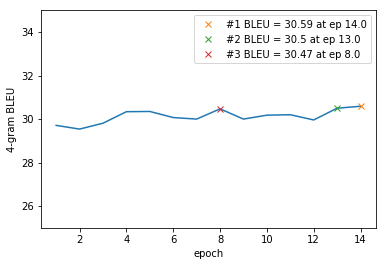

('tst2013', '0.8-alwaysMSE10.0')


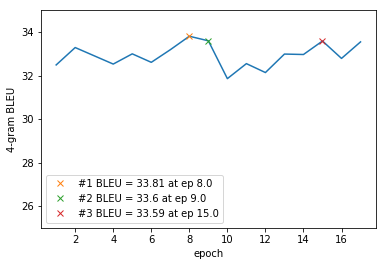

('tst2014', '0.8-alwaysMSE10.0')


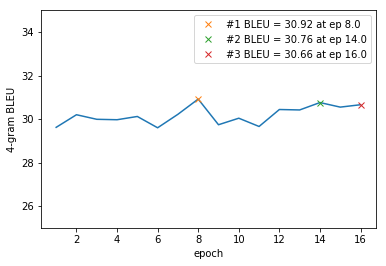

In [4]:
for fr in ['0.9-alwaysKLsmooth2.0', '0.9-alwaysKLsmooth1.0', '0.9-alwaysKLsmooth0.5', 
           '0.8-alwaysKLsmooth10.0', '0.8-alwaysKLsmooth5.0', '0.8-alwaysKLsmooth2.0', '0.8-alwaysKLsmooth1.0', 
           '0.8-alwaysMSE20.0', '0.8-alwaysMSE10.0']:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf{}/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35], nb_top=3)

('tst2013', '0.8-selectKL2.0')


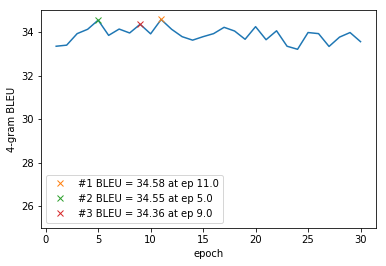

('tst2014', '0.8-selectKL2.0')


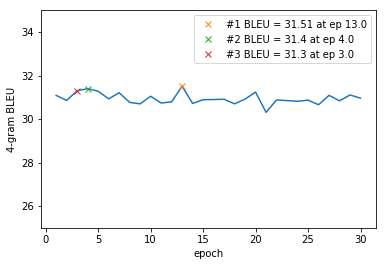

('tst2013', '0.8-selectKL10.0')


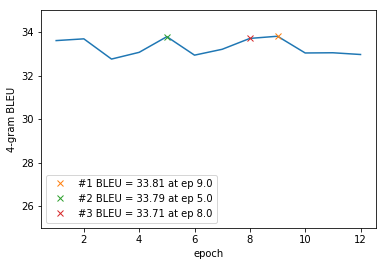

('tst2014', '0.8-selectKL10.0')


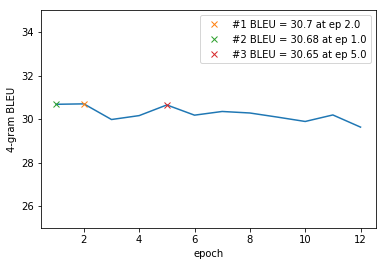

('tst2013', '0.8-selectKL50.0')


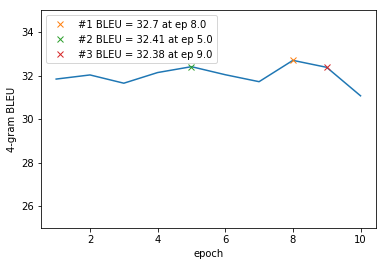

('tst2014', '0.8-selectKL50.0')


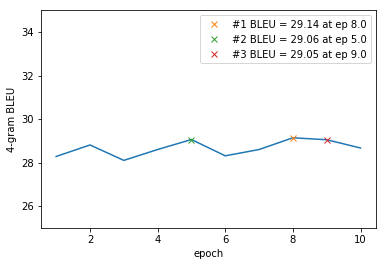

In [5]:
for fr in ['0.8-selectKL2.0', '0.8-selectKL10.0', '0.8-selectKL50.0']:
    for tst in ['tst2013', 'tst2014']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-aoaf-tf{}/{}/'.format(fr, tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[25,35], nb_top=3)

('tst-COMMON', 3.0)


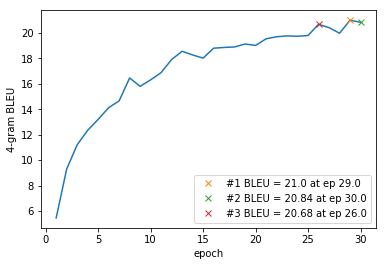

In [17]:
for fr in [3.0]:
    for tst in ['tst-COMMON']:
        print(tst, fr)
        dirSet = '/home/dawna/tts/qd212/models/af/results/models-v0ende/v0000-tf-lr0.001/{}/'.format(tst)
        plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True), ylim=[])

check loss

In [45]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.0-log/dct_info.pkl'
with open(dirFile,'rb') as f:
    dct_info_2 = pickle.load(f)

dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr4.0/dct_info.pkl'
with open(dirFile,'rb') as f:
    dct_info_4 = pickle.load(f)

dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr8.0/dct_info.pkl'
with open(dirFile,'rb') as f:
    dct_info_8 = pickle.load(f)

for dct in [dct_info_2, dct_info_4, dct_info_8]:
    for k in dct.keys():
        dct[k] = moving_avg(dct[k], N=500)

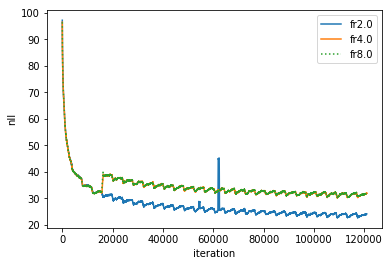

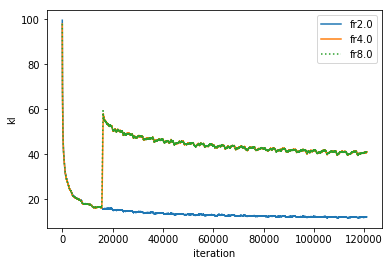

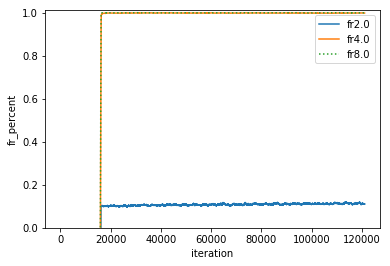

In [48]:
for k in ['nll', 'kl', 'fr_percent']:
    plt.plot(dct_info_2[k], label='fr2.0')
    plt.plot(dct_info_4[k], label='fr4.0')
    plt.plot(dct_info_8[k], ':', label='fr8.0')
    if k=='fr_percent': plt.ylim([0,1.01])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

In [7]:
fr_lst = [2.0, 2.5, 3.0, 3.1, 3.15, 3.25]
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.0-log/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.5/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.1/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.15/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.25/dct_info.pkl'
              ]
dct_lst = []
for dirFile in dirFile_lst:
    with open(dirFile,'rb') as f:
        dct_lst.append(pickle.load(f))

for dct in dct_lst:
    for k in dct.keys():
        dct[k] = moving_avg(dct[k], N=500)

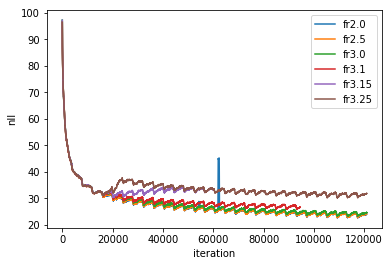

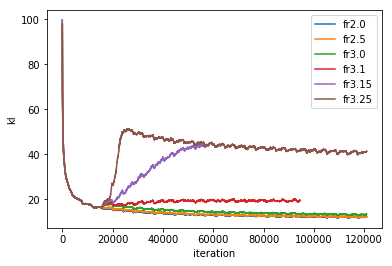

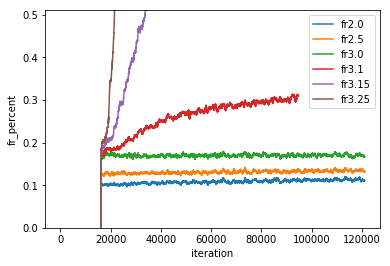

In [8]:
for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='fr{}'.format(fr))
    if k=='fr_percent': plt.ylim([0,0.51])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

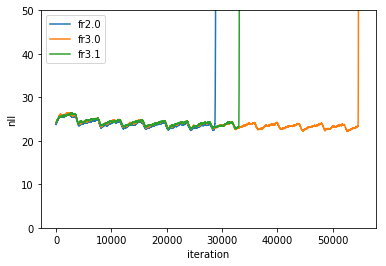

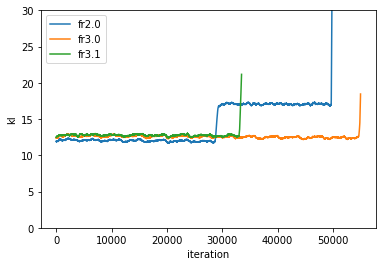

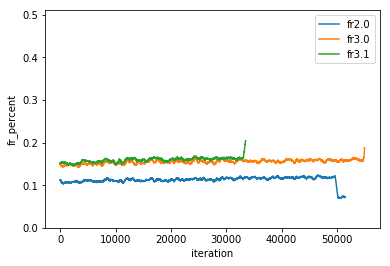

In [9]:
fr_lst = [2.0, 3.0, 3.1]
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr2.0-pretrain/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr3.0-pretrain/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr3.1-pretrain/dct_info.pkl'
              ]
dct_lst = []
for dirFile in dirFile_lst:
    with open(dirFile,'rb') as f:
        dct_lst.append(pickle.load(f))

for dct in dct_lst:
    for k in dct.keys():
        dct[k] = moving_avg(dct[k], N=500)
        
for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='fr{}'.format(fr))
    if k=='fr_percent': plt.ylim([0,0.51])
    if k=='nll': plt.ylim([0,50])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

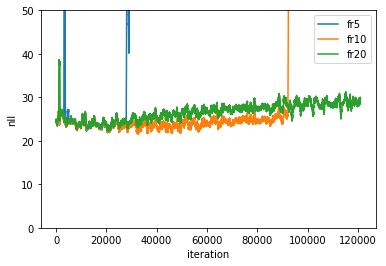

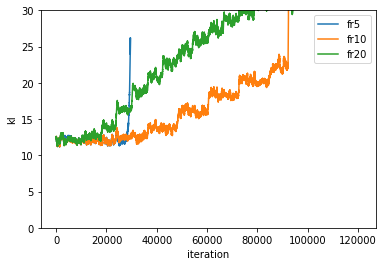

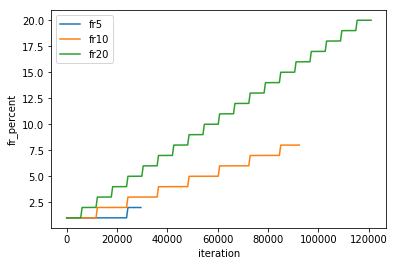

In [13]:
fr_lst = [5, 10, 20]
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0040-paf-nbFrToken5/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0040-paf-nbFrToken10/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0040-paf-nbFrToken20/dct_info.pkl'
              ]
dct_lst = []
for dirFile in dirFile_lst:
    with open(dirFile,'rb') as f:
        dct_lst.append(pickle.load(f))

for dct in dct_lst:
    for k in dct.keys():
        dct[k] = moving_avg(dct[k], N=500)
        
for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='fr{}'.format(fr))
#     if k=='fr_percent': plt.ylim([0,0.51])
    if k=='nll': plt.ylim([0,50])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

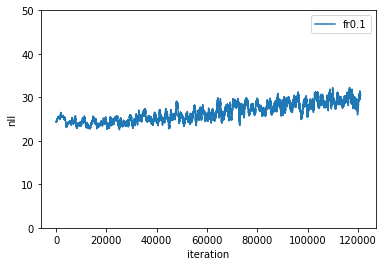

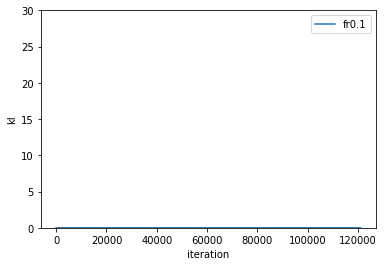

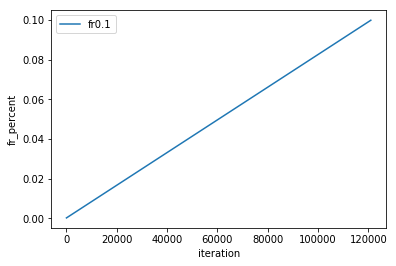

In [9]:
fr_lst = [0.1]
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0004-ss-max0.1linear/dct_info.pkl'
              ]
dct_lst = []
for dirFile in dirFile_lst:
    with open(dirFile,'rb') as f:
        dct_lst.append(pickle.load(f))

for dct in dct_lst:
    for k in dct.keys():
        dct[k] = moving_avg(dct[k], N=500)
        
for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='fr{}'.format(fr))
#     if k=='fr_percent': plt.ylim([0,0.51])
    if k=='nll': plt.ylim([0,50])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

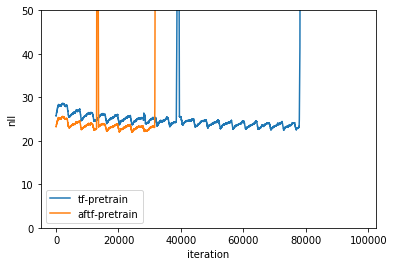

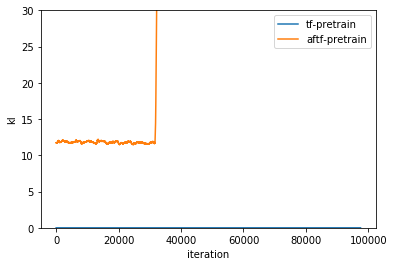

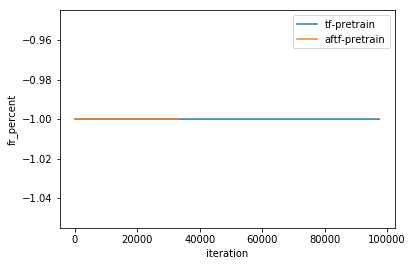

In [19]:
fr_lst = ['tf-pretrain', 'aftf-pretrain']
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50-pretrain/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0013-aftf-pretrain/dct_info.pkl'
              ]
dct_lst = get_dct_lst(dirFile_lst)
dct_lst = smooth_dct_lst(dct_lst)

for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='{}'.format(fr))
#     if k=='fr_percent': plt.ylim([0,0.51])
    if k=='nll': plt.ylim([0,50])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

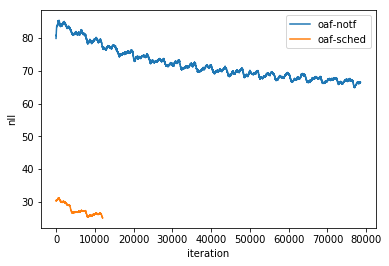

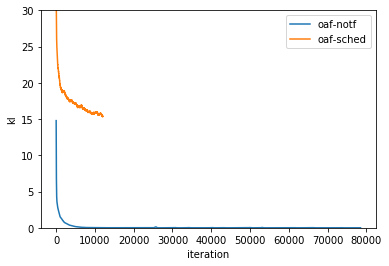

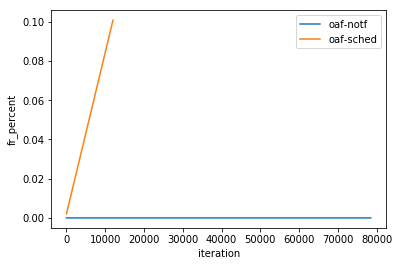

In [20]:
fr_lst = ['oaf-notf', 'oaf-sched']
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-notf/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-sched/dct_info.pkl'
              ]
dct_lst = get_dct_lst(dirFile_lst)
dct_lst = smooth_dct_lst(dct_lst)
        
for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='{}'.format(fr))
#     if k=='fr_percent': plt.ylim([0,0.51])
#     if k=='nll': plt.ylim([0,50])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

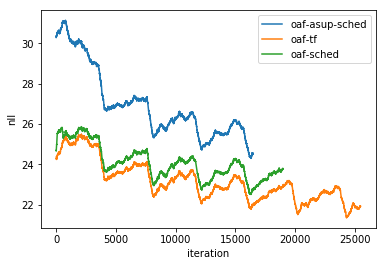

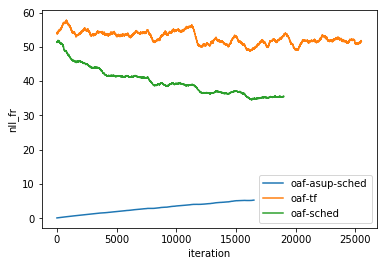

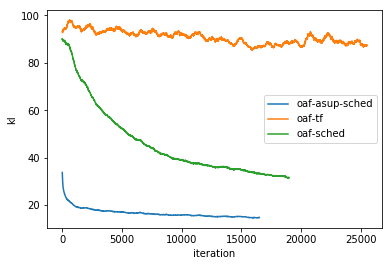

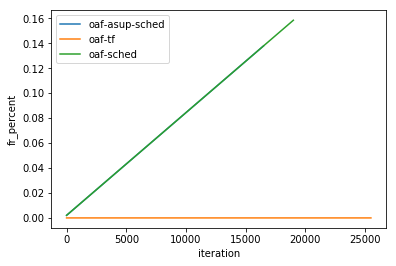

In [4]:
fr_lst = ['oaf-asup-sched', 'oaf-tf', 'oaf-sched']
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-asup-sched/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-sched/dct_info.pkl'
              ]
dct_lst = get_dct_lst(dirFile_lst)
dct_lst = smooth_dct_lst(dct_lst)
        
for k in ['nll', 'nll_fr', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='{}'.format(fr))
#     if k=='fr_percent': plt.ylim([0,0.51])
#     if k=='nll': plt.ylim([0,50])
#     if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

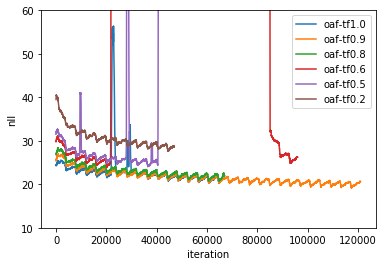

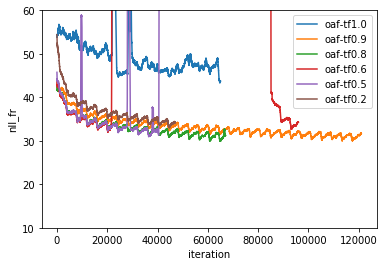

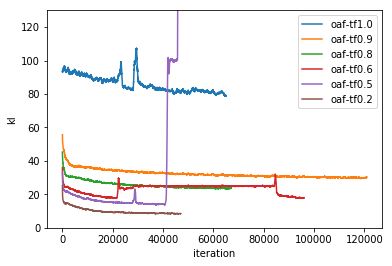

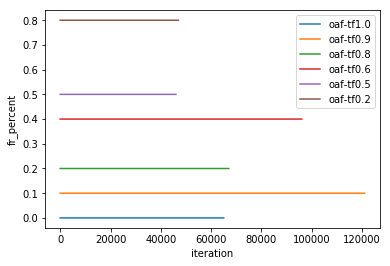

In [6]:
# fr_lst = ['oaf-tf1.0', 'oaf-tf0.8'] # dct broken
fr_lst = ['oaf-tf1.0', 'oaf-tf0.9', 'oaf-tf0.8', 'oaf-tf0.6', 'oaf-tf0.5', 'oaf-tf0.2']
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf1.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.9/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.8/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.6/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.5/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.2/dct_info.pkl'
              ]
dct_lst = get_dct_lst(dirFile_lst)
dct_lst = smooth_dct_lst(dct_lst)
        
for k in ['nll', 'nll_fr', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='{}'.format(fr))
#     if k=='fr_percent': plt.ylim([0,0.51])
    if 'nll' in k: plt.ylim([10,60])
    if k=='kl': plt.ylim([0,130])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

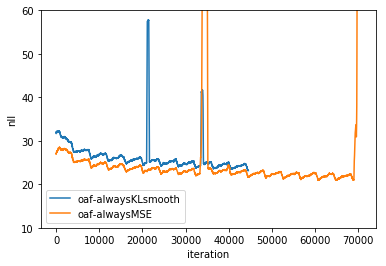

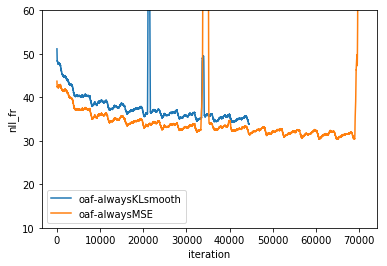

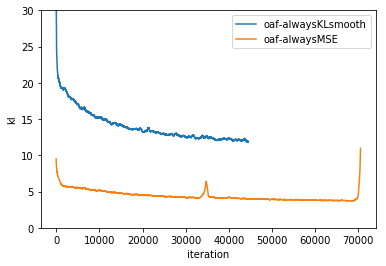

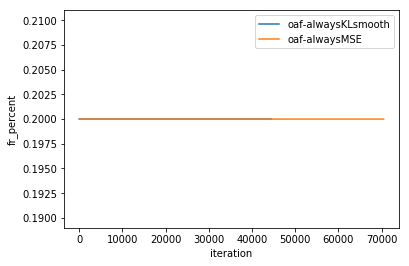

In [7]:
fr_lst = ['oaf-alwaysKLsmooth', 'oaf-alwaysMSE']
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.8-alwaysKLsmooth10.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.8-alwaysMSE10.0/dct_info.pkl'
              ]
dct_lst = get_dct_lst(dirFile_lst)
dct_lst = smooth_dct_lst(dct_lst)
        
for k in ['nll', 'nll_fr', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='{}'.format(fr))
#     if k=='fr_percent': plt.ylim([0,0.51])
    if 'nll' in k: plt.ylim([10,60])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

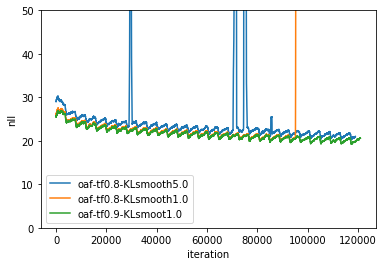

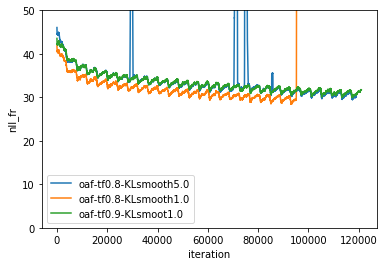

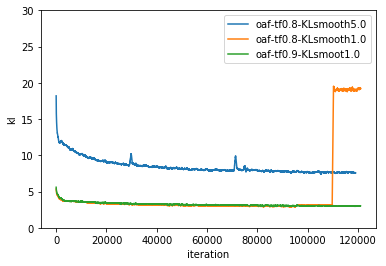

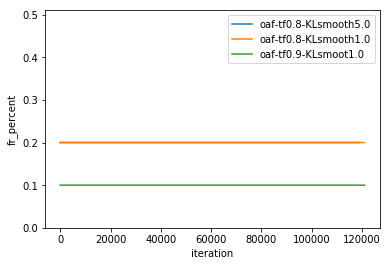

In [66]:
fr_lst = ['oaf-tf0.8-KLsmooth5.0', 'oaf-tf0.8-KLsmooth1.0', 'oaf-tf0.9-KLsmoot1.0']
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.8-alwaysKLsmooth5.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.8-alwaysKLsmooth1.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.9-alwaysKLsmooth1.0/dct_info.pkl'
              ]
dct_lst = get_dct_lst(dirFile_lst)
dct_lst = smooth_dct_lst(dct_lst)
        
for k in ['nll', 'nll_fr', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='{}'.format(fr))
    if k=='fr_percent': plt.ylim([0,0.51])
    if 'nll' in k: plt.ylim([0,50])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

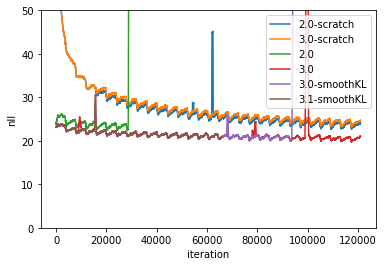

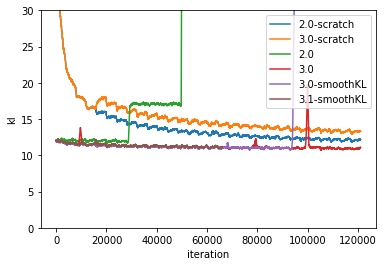

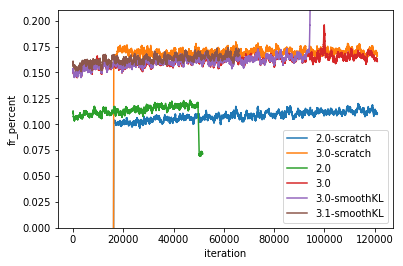

In [72]:
fr_lst = ['2.0-scratch', '3.0-scratch', '2.0', '3.0', '3.0-smoothKL', '3.1-smoothKL']
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr2.0-pretrain/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr3.0-pretrain-lr0.001/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr3.0-pretrain-lr0.001-smoothKL/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr3.1-pretrain-lr0.001-smoothKL/dct_info.pkl'
              ]
dct_lst = get_dct_lst(dirFile_lst)
dct_lst = smooth_dct_lst(dct_lst)
        
for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='{}'.format(fr))
    if k=='fr_percent': plt.ylim([0,0.21])
    if 'nll' in k: plt.ylim([0,50])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

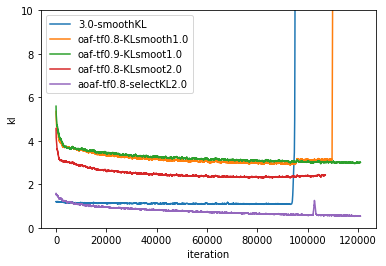

In [80]:
fr_lst = ['3.0-smoothKL', 'oaf-tf0.8-KLsmooth1.0', 'oaf-tf0.9-KLsmoot1.0', 'oaf-tf0.8-KLsmoot2.0', 'aoaf-tf0.8-selectKL2.0']
gamma_lst = [10.0, 1.0, 1.0, 2.0, 2.0*(1-0.8)]
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0030-sched-fr3.0-pretrain-lr0.001-smoothKL/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.8-alwaysKLsmooth1.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.9-alwaysKLsmooth1.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-oaf-tf0.8-alwaysKLsmooth2.0/dct_info.pkl',
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0050-aoaf-tf0.8-selectKL2.0/dct_info.pkl'
              ]
dct_lst = get_dct_lst(dirFile_lst)
dct_lst = smooth_dct_lst(dct_lst)
        
# for k in ['nll', 'nll_fr', 'kl', 'fr_percent']:
for k in ['kl']:
    for idx, (fr, dct) in enumerate(zip(fr_lst, dct_lst)):
        plt.plot(dct[k] / gamma_lst[idx], label='{}'.format(fr))
    if k=='kl': plt.ylim([0,10])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

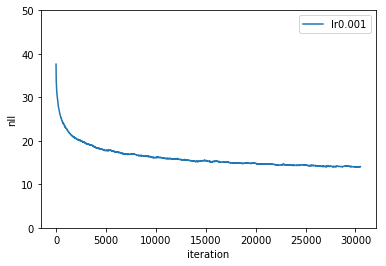

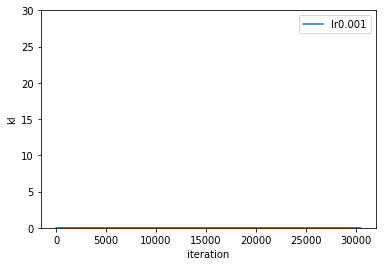

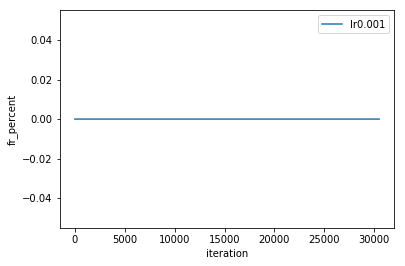

In [14]:
fr_lst = [0.001]
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v0ende/v0000-tf-lr0.001/dct_info.pkl'
              ]
dct_lst = []
for dirFile in dirFile_lst:
    with open(dirFile,'rb') as f:
        dct_lst.append(pickle.load(f))

for dct in dct_lst:
    for k in dct.keys():
        dct[k] = moving_avg(dct[k], N=500)
#         dct[k] = dct[k][::200]
        
for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='lr{}'.format(fr))
#     if k=='fr_percent': plt.ylim([0,0.51])
    if k=='nll': plt.ylim([0,50])
    if k=='kl': plt.ylim([0,30])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

check data

In [49]:
dirFile = '/home/dawna/tts/qd212/models/af/af-lib/iwslt15-enfr/iwslt15_en_fr/train.tags.en-fr.en'
with open(dirFile, 'r') as f:
    seq_src_train = f.readlines()
    
dirFile = '/home/dawna/tts/qd212/models/af/af-lib/iwslt15-enfr/iwslt15_en_fr/train.tags.en-fr.fr'
with open(dirFile, 'r') as f:
    seq_tgt_train = f.readlines()
    
seq_src_tgt_train = [s+t for s,t in zip(seq_src_train, seq_tgt_train)]
print(len(seq_src_train), len(seq_tgt_train), len(seq_src_tgt_train))

(207577, 207577, 207577)


In [36]:
dct_pair_cnt = {i:seq_src_tgt_train.count(i) for i in seq_src_tgt_train}

In [37]:
tmp_pair = dct_pair_cnt.items()
tmp_pair.sort(key = lambda x: x[1])
lst_seq_pair, lst_cnt_pair = map(list, zip(*tmp_pair))

In [39]:
print(len(tmp_pair), tmp_pair[-4:])
for limit in [1, 10, 100]:
    lst_cnt_rep = [l for l in lst_cnt_pair if l>limit]
    print(limit, len(lst_cnt_rep))

(205448, [('Thank you .\nMerci\n', 40), ('\n\n', 218), ('Thank you very much .\nMerci beaucoup .\n', 328), ('Thank you .\nMerci .\n', 788)])
(1, 356)
(10, 13)
(100, 3)


In [63]:
my_dict = {i:seq_src_train.count(i) for i in seq_src_train}

In [64]:
tmp = my_dict.items()
tmp.sort(key = lambda x: x[1])
lst_seq, lst_cnt = map(list, zip(*tmp))

(1, 629)
(10, 17)
(100, 3)
629


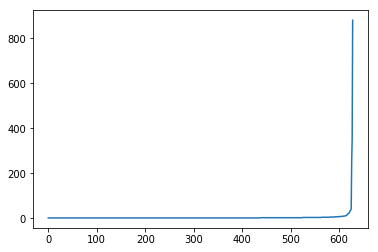

609


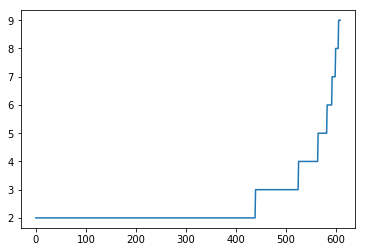

In [85]:
# print(len([l for l in lst_cnt if l>1]))
# print(len([l for l in lst_cnt if l>1]))

for limit in [1, 10, 100]:
    lst_cnt_rep = [l for l in lst_cnt if l>limit]
    print(limit, len(lst_cnt_rep))


lst_cnt_rep = [l for l in lst_cnt if l>1]
print(len(lst_cnt_rep))
plt.plot(lst_cnt_rep)
# plt.ylim(0,30)
plt.show()

lst_cnt_rep = [l for l in lst_cnt if l>1 and l<10]
print(len(lst_cnt_rep))
plt.plot(lst_cnt_rep)
# plt.ylim(0,30)
plt.show()

check AAF

In [38]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.0-log/dct_fr_seqs.pkl'
with open(dirFile,'rb') as f:
    dct_fr_seqs = pickle.load(f)
print(len(dct_fr_seqs))

tmp = dct_fr_seqs.items()
tmp.sort(key = lambda x: x[1])
lst_seq, lst_cnt = map(list, zip(*tmp))
lst_l = [len(s) for s in lst_seq]

64635


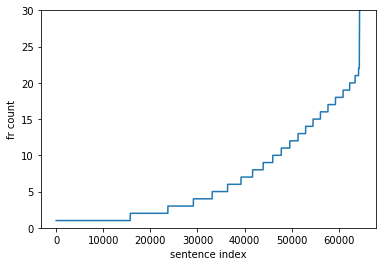

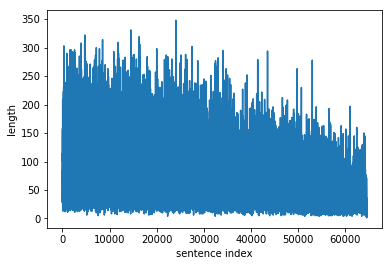

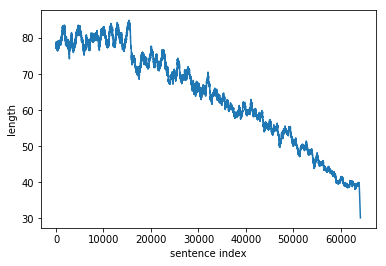

fr cnt: 1
[('Voice : And who are these ? MT : Ah , mischief @-@ makers . Watch .', 1), ('One &apos;s a boiling chamber , and one &apos;s the water holder .', 1), ('Barack Obama won - - because he mobilized people as never before through the use of social networks .', 1), ('And you see that Z.Q. there was 80 @-@ odd .', 1), ('I &apos;m so lucky that there &apos;s this archive of performances that I can share with my students .', 1), ('In the simplicity realm , it &apos;s also interesting .', 1), ('Gone very fast , disappeared .', 1), ('So we humored him , we kept him happy . &quot;', 1), ('She went to vocational school for accounting .', 1), ('If you put a five year @-@ old child &apos;s dexterity against the best robots of today , the answer is simple : the child wins easily .', 1)]
fr cnt: 4
[('And it cost Nokia absolutely nothing .', 4), ('&quot; We have lasers ; we can <unk> it out . &quot;', 4), ('The miracle of your mind isn &apos;t that you can see the world as it is .', 4), ('Ov

In [49]:
plt.plot(lst_cnt)
plt.ylim(0,30)
plt.xlabel('sentence index'); plt.ylabel('fr count')
plt.show()

plt.plot(lst_l)
plt.xlabel('sentence index'); plt.ylabel('length')
plt.show()

plt.plot(moving_avg(lst_l))
plt.xlabel('sentence index'); plt.ylabel('length')
# plt.xlim(0,30)
plt.show()

for start in [0, 30000, 50000, 60000]:
    print('fr cnt: {}'.format(lst_cnt[start]))
    print(tmp[start:start+10])

# print(tmp[:10])
# plt.plot(lst_cnt[:500])
# plt.ylim(0,30)
# plt.show()

# print(tmp[-10:])
# plt.plot(lst_cnt[-500:])
# plt.ylim(0,100)
# plt.show()

In [3]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/dct_fr_seqs.pkl'
with open(dirFile,'rb') as f:
    dct_fr_seqs = pickle.load(f)
print(len(dct_fr_seqs))

tmp = dct_fr_seqs.items()
tmp.sort(key = lambda x: x[1])
lst_seq, lst_cnt = map(list, zip(*tmp))
lst_l = [len(s) for s in lst_seq]

108790


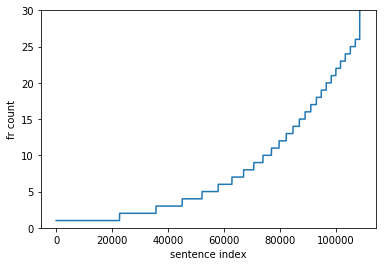

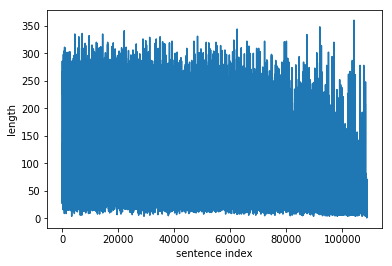

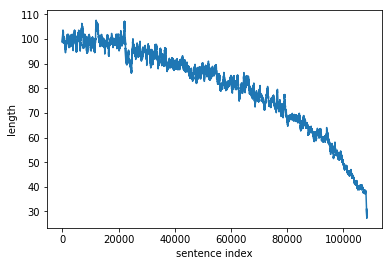

In [4]:
plt.plot(lst_cnt)
plt.ylim(0,30)
plt.xlabel('sentence index'); plt.ylabel('fr count')
plt.show()

plt.plot(lst_l)
plt.xlabel('sentence index'); plt.ylabel('length')
plt.show()

plt.plot(moving_avg(lst_l))
plt.xlabel('sentence index'); plt.ylabel('length')
# plt.xlim(0,30)
plt.show()

clean disk